In [3]:
import pandas as pd
import sqlite3 as sq

## create connection

In [4]:
db =  sq.connect('../data/checking-logs.sqlite.sqlite')

## query

In [6]:
query = 'SELECT datetime FROM pageviews WHERE uid LIKE "user_%";'
res = pd.io.sql.read_sql(query, db, parse_dates=['datetime'])
res['datetime'] = res['datetime'].apply(lambda x: x.floor('D'))
views = pd.DataFrame(res.groupby(['datetime'], as_index=True).size(), columns = ['views'])

In [7]:
query = 'SELECT timestamp FROM checker WHERE uid LIKE "user_%";'
res = pd.io.sql.read_sql(query, db, parse_dates=['timestamp'])
res['timestamp'] = res['timestamp'].apply(lambda x: x.floor('D'))
commits = pd.DataFrame(res.groupby(['timestamp'], as_index=True).size(), columns = ['commits'])

In [8]:
new = views.join(commits, on=None, how='inner', sort=False)

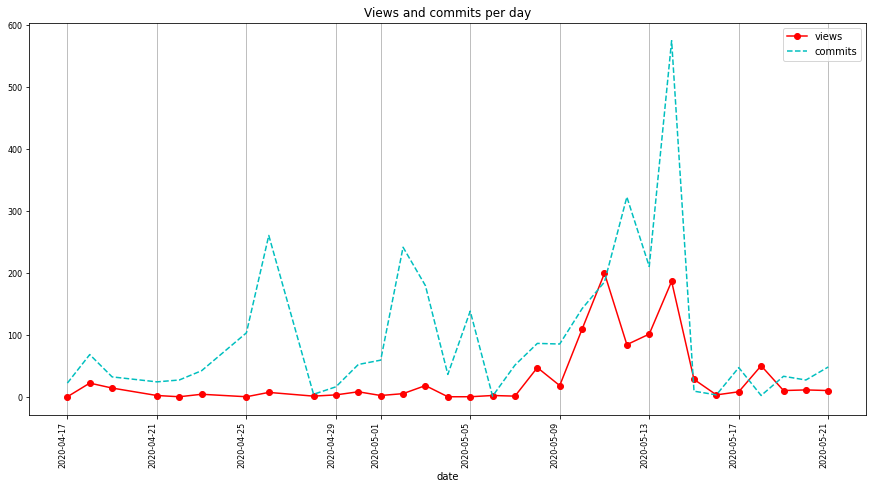

In [9]:
(new.plot(fontsize = 8, xlabel = 'date', figsize = (15, 8), title = "Views and commits per day", rot = 90, style=['ro-', 'c--'])).xaxis.grid()


## “How many times was the number of views larger than 150?” Insert: “The answer is 2”. 

In [10]:
db.close()